<a href="https://colab.research.google.com/github/emnordi/ce888/blob/master/Project2/Project2_Mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import os
import io
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
!git clone https://github.com/emnordi/ce888.git
from ce888.Project2.utils import *
os.environ['KAGGLE_USERNAME'] = "emilnordin" # username from the json file

os.environ['KAGGLE_KEY'] = "fd1ae7405c909d36a1ecffea5cd2749a" # key from the json file

Cloning into 'ce888'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 278 (delta 31), reused 0 (delta 0), pack-reused 212
Receiving objects: 100% (278/278), 7.61 MiB | 32.62 MiB/s, done.
Resolving deltas: 100% (121/121), done.


DOWNLOADING AND IMPORTING DATASET

In [22]:
!kaggle datasets download -d uciml/mushroom-classification

  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 61.9MB/s]


In [0]:
data_mush = pd.read_csv('mushroom-classification.zip', compression='zip', header=0, sep=',', quotechar='"', encoding = "utf-8")

In [0]:
#Downsample to get 65% imbalance
mush_p_ind = data_mush[data_mush['class'] == 'p'].index
to_del = mush_p_ind[0:int(len(mush_p_ind)*0.43)]
data_mush_imbalanced = data_mush.drop(index=to_del)

#Convert string data to numerical
data_mush_imbalanced_ = pd.get_dummies(data_mush_imbalanced)
data_mush_imbalanced_ = data_mush_imbalanced_.drop('class_e', axis=1)

PRINTING DATASET

In [25]:
print(data_mush_imbalanced_)

      class_p  cap-shape_b  cap-shape_c  ...  habitat_p  habitat_u  habitat_w
1           0            0            0  ...          0          0          0
2           0            1            0  ...          0          0          0
4           0            0            0  ...          0          0          0
5           0            0            0  ...          0          0          0
6           0            1            0  ...          0          0          0
...       ...          ...          ...  ...        ...        ...        ...
8119        0            0            0  ...          0          0          0
8120        0            0            0  ...          0          0          0
8121        0            0            0  ...          0          0          0
8122        1            0            0  ...          0          0          0
8123        0            0            0  ...          0          0          0

[6441 rows x 116 columns]


DISPLAY AMOUNT OF ROWS EACH CLASS HAS, AND IMBALANCE OF DATASET

In [26]:
print(data_mush_imbalanced_['class_p'].value_counts())
print("Imbalance:", data_mush_imbalanced_['class_p'].value_counts()[0]/sum(data_mush_imbalanced_.class_p.value_counts()))

0    4208
1    2233
Name: class_p, dtype: int64
Imbalance: 0.6533147026859183


BASE RESULTS

In [0]:
#Create decision tree and random forest classifiers
tree_clf = tree.DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [28]:
#Mushroom dataset base scores DT
feat_mush = np.array(data_mush_imbalanced_.drop('class_p', axis=1))
lab_mush = np.array(data_mush_imbalanced_['class_p'])

base = Utils.evaluatePerformance(tree_clf, feat_mush, lab_mush)

Accuracy: 0.9996899224806202 +/- 0.0009302325581395434
Precision: 1.0 +/- 0.0
Recall: 0.9991071428571429 +/- 0.0026785714285714195
F1-Score: 0.9995515695067265 +/- 0.0013452914798206318


In [29]:
#Mushroom dataset base scores RF
Utils.evaluatePerformance(rf_clf, feat_mush, lab_mush);

Accuracy: 0.9394662718474649 +/- 0.06735361076015547
Precision: 0.9823529411764707 +/- 0.05294117647058825
Recall: 0.8455557335041641 +/- 0.19442270997092245
F1-Score: 0.8938599999924101 +/- 0.12518101965784512


DOWNSAMPLING THE DATASETS AND RETRIEVING NEW PERFORMANCE RESULTS

In [30]:
#Downsample MUSHROOM DATASET to get 50%
mush_p_ind_ = data_mush_imbalanced_[data_mush_imbalanced_['class_p'] == 0].index
to_del = mush_p_ind_[0:int(len(mush_p_ind_)*0.46)]
data_mush_imbalanced_test = data_mush_imbalanced_.drop(index=to_del)

print(data_mush_imbalanced_test['class_p'].value_counts())
print("Imbalance:", data_mush_imbalanced_test['class_p'].value_counts()[0]/(data_mush_imbalanced_test['class_p'].value_counts()[1]+(data_mush_imbalanced_test['class_p'].value_counts()[0])))

0    2273
1    2233
Name: class_p, dtype: int64
Imbalance: 0.5044385264092321


In [32]:
#MUSHROOM DATASET downsampling scores DT
feat_mush_test = data_mush_imbalanced_test.drop('class_p', axis=1)
lab_mush_test = data_mush_imbalanced_test['class_p']

downsampled = Utils.evaluatePerformance(tree_clf, feat_mush_test, lab_mush_test)

Accuracy: 0.9995565410199557 +/- 0.0013303769401330269
Precision: 1.0 +/- 0.0
Recall: 0.9991031390134528 +/- 0.002690582959641263
F1-Score: 0.9995495495495496 +/- 0.001351351351351371


In [33]:
#MUSHROOM DATASET downsampling scores RF
Utils.evaluatePerformance(rf_clf, feat_mush_test, lab_mush_test);

Accuracy: 0.9640517368810052 +/- 0.0361381719284135
Precision: 0.9780786764002677 +/- 0.04419424791743765
Recall: 0.952017937219731 +/- 0.07225299359439556
F1-Score: 0.9623570737843696 +/- 0.03864489162821345


OVERSAMPLING AND TEST RESULTS

In [34]:
#OVERSAMPLING MUSHROOM DATASET
max_ = data_mush_imbalanced_['class_p'].value_counts().max()

temp = [data_mush_imbalanced_]
for class_index, group in data_mush_imbalanced_.groupby('class_p'):
    temp.append(group.sample(max_-len(group), replace=True))
data_mush_over = pd.concat(temp)

print(data_mush_over['class_p'].value_counts())
print("Imbalance:", data_mush_over['class_p'].value_counts()[0]/(data_mush_over['class_p'].value_counts()[1]+(data_mush_over['class_p'].value_counts()[0])))

1    4208
0    4208
Name: class_p, dtype: int64
Imbalance: 0.5


In [36]:
#MUSHROOM DATASET oversampling scores DT
feat_mush_over = data_mush_over.drop('class_p', axis=1)
lab_mush_over = data_mush_over['class_p']

oversampled = Utils.evaluatePerformance(tree_clf, feat_mush_over, lab_mush_over)

Accuracy: 1.0 +/- 0.0
Precision: 1.0 +/- 0.0
Recall: 1.0 +/- 0.0
F1-Score: 1.0 +/- 0.0


In [37]:
#MUSHROOM DATASET oversampling scores RF
Utils.evaluatePerformance(rf_clf, feat_mush_over, lab_mush_over);

Accuracy: 0.9417734514674025 +/- 0.05322950017318399
Precision: 0.9818371607515658 +/- 0.05448851774530271
Recall: 0.9042404705350074 +/- 0.09267738045040982
F1-Score: 0.9376277982344163 +/- 0.060744280582808216


USING NEW ALGORITHM TO CLASSIFY THE DATA

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics.cluster import adjusted_rand_score

In [39]:
#MUSHROOM DATASET
skf = StratifiedKFold(n_splits=10)
print(lab_mush.shape)

(6441,)


Silhouette method & Elbow method - amount of cluster determination

In [0]:
#Initialise random forest classifier and lists to hold performance for each permutation
random_forest_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_classifiers = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

finding clusters


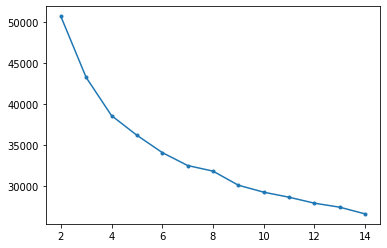

Silhouette predicted 7 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 4
finding clusters


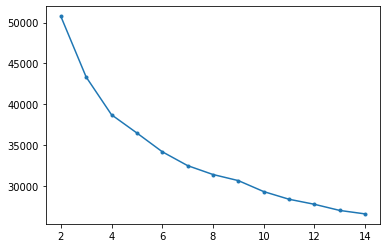

Silhouette predicted 8 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 8
finding clusters


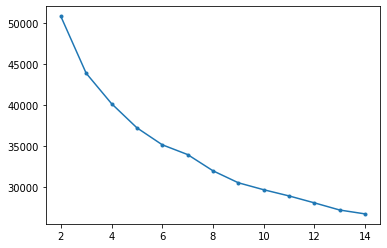

Silhouette predicted 9 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 4
finding clusters


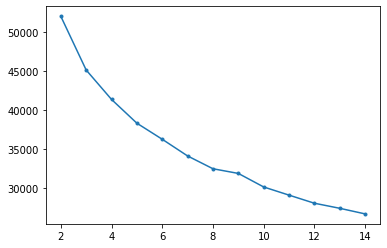

Silhouette predicted 7 clusters. Please enter elbow results:
3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 3
finding clusters


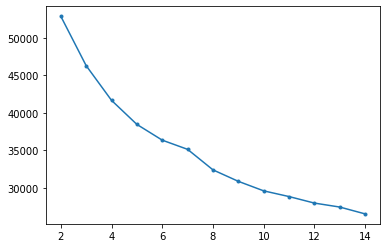

Silhouette predicted 9 clusters. Please enter elbow results:
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 4
finding clusters


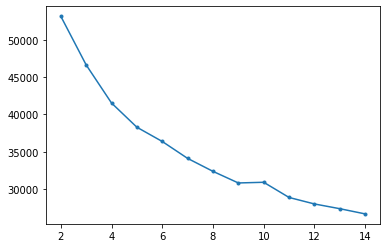

Silhouette predicted 9 clusters. Please enter elbow results:
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 6
finding clusters


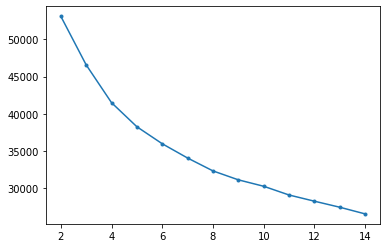

Silhouette predicted 9 clusters. Please enter elbow results:
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 5
finding clusters


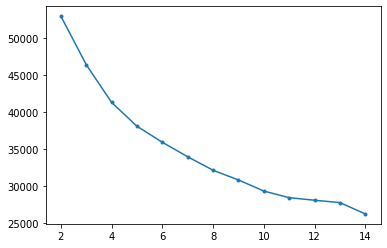

Silhouette predicted 10 clusters. Please enter elbow results:
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 5
finding clusters


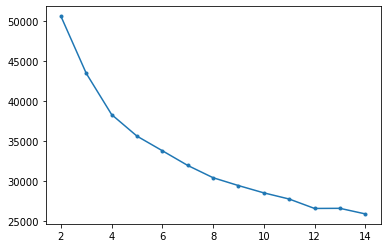

Silhouette predicted 8 clusters. Please enter elbow results:
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K value with best performance: 6


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


finding clusters


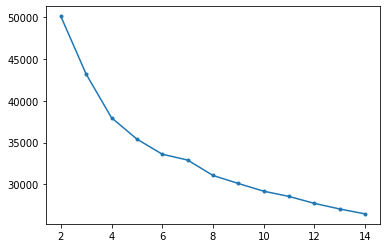

Silhouette predicted 6 clusters. Please enter elbow results:
4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K value with best performance: 4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
for train, test in skf.split(feat_mush, lab_mush):
  test_labels = []

  #Retrieve the predicted amount of clusters and the best performing KMeans model
  n_clusters, final_model = Utils.cluster_and_model(feat_mush[train], lab_mush[train])

  #Retrieve the clusters containing missclassified data and the indices of these clusters in the training data
  missclassified_cluster_data_index, missclassified_clusters = Utils.find_missclassified_clusters(n_clusters, lab_mush[train], final_model.labels_)
  rf_classifiers = [0]*n_clusters
  #Go through the clusters with missclassified data and train a random forest classifier for each
  for i in missclassified_clusters:
    f = feat_mush[train]
    f1 = f[missclassified_cluster_data_index[i], :]
    l  = lab_mush[train]
    l1 = np.take(l, missclassified_cluster_data_index[i])
    rf_classifiers[i] = random_forest_clf.fit(f1, l1)
  
  #For each point in test dataset, give it a cluster
  for x in feat_mush[test]:
    prediction = final_model.predict(np.array([x]))
    if prediction in missclassified_clusters:
      test_labels.append(rf_classifiers[prediction[0]].predict(np.array([x])))
    else:
      test_labels.append(prediction)
  accuracy_scores.append(accuracy_score(test_labels, lab_mush[test]))
  precision_scores.append(precision_score(test_labels, lab_mush[test]))
  recall_scores.append(recall_score(test_labels, lab_mush[test]))
  f1_scores.append(f1_score(test_labels, lab_mush[test]))
  

EVALUATING RESULTS FROM PROPOSED ALGORITHM

In [42]:
print("Accuracy:", np.mean(accuracy_scores), "+/-", np.std(accuracy_scores))
print("Precision:", np.mean(precision_scores), "+/-", np.std(precision_scores))
print("Recall:", np.mean(recall_scores), "+/-", np.std(recall_scores))
print("F1-Score:", np.mean(f1_scores), "+/-", np.std(f1_scores))

Accuracy: 0.8917745197168857 +/- 0.13692006166204942
Precision: 0.6883768417680974 +/- 0.39385572004660807
Recall: 0.8 +/- 0.4
F1-Score: 0.725929677606574 +/- 0.3880683532591831


APPLYING SMOTE SAMPLING

In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [44]:
smote_feat, smote_lab = sm.fit_resample(feat_mush, lab_mush)
print("Imbalance:", np.bincount(smote_lab)[0]/(np.bincount(smote_lab)[1]+( np.bincount(smote_lab)[0])))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Imbalance: 0.5


EVALUATING RESULTS FROM SMOTE

In [45]:
#Decision tree results
smote = Utils.evaluatePerformance(tree_clf, smote_feat, smote_lab)

Accuracy: 0.999643705463183 +/- 0.00106888361045131
Precision: 1.0 +/- 0.0
Recall: 0.9992874109263659 +/- 0.00213776722090262
F1-Score: 0.9996424314660309 +/- 0.0010727056019070313


In [46]:
#Random forest results
Utils.evaluatePerformance(rf_clf, smote_feat, smote_lab);

Accuracy: 0.938091035160608 +/- 0.05919517489758461
Precision: 0.9813304721030043 +/- 0.05600858369098712
Recall: 0.8968804433887568 +/- 0.101473802394853
F1-Score: 0.9329458463635296 +/- 0.06876034998388304


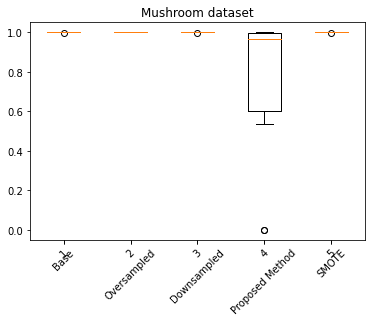

In [47]:
Utils.boxplots("Mushroom dataset", base, oversampled, downsampled, f1_scores, smote)